# Determining water mass definitions for the Optimum Multi-Parameter Analysis from World Ocean Atlas 2018 data
The contents of this notebook will perform the following:<br>
1)  <br>
2) 

### Imports

In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import glob
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.feature as cpf
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import seawater as sw
import cmocean.cm as cmo
import gsw


### Load data

In [2]:
temp_ds = xr.open_dataset('https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/woa/temperature/decav/1.00/woa18_decav_t00_01.nc', decode_times=False)
sal_ds  = xr.open_dataset('https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/woa/salinity/decav/1.00/woa18_decav_s00_01.nc', decode_times=False)
den_ds  = xr.open_dataset('https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/woa/density/decav/1.00/woa18_decav_I00_01.nc', decode_times=False)
oxy_ds  = xr.open_dataset('https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/woa/oxygen/all/1.00/woa18_all_o00_01.nc', decode_times=False)

In [13]:
oxy_ds

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 102, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * depth               (depth) float32 0.0 5.0 10.0 ... 5.3e+03 5.4e+03 5.5e+03
  * time                (time) float32 8.214e+03
Dimensions without coordinates: nbounds
Data variables:
    crs                 int32 -2147483647
    lat_bnds            (lat, nbounds) float32 -90.0 -89.0 -89.0 ... 89.0 90.0
    lon_bnds            (lon, nbounds) float32 -180.0 -179.0 ... 179.0 180.0
    depth_bnds          (depth, nbounds) float32 0.0 2.5 ... 5.45e+03 5.5e+03
    climatology_bounds  (time, nbounds) float32 7.512e+03 8.928e+03
    o_an                (time, depth, lat, lon) float32 ...
    o_mn                (time, depth, lat, lon) float32 ...
    o_dd                (time, depth, lat, lon) float64 ...
    o_sd                (time, depth, lat, lon) float32 ...
    o_se                (time, depth, lat, lon) float32 ...
    o_oa                (time, depth, lat, lon) float32 ...
    o_gp                (time, depth, lat, lon) float64 ...
Attributes: (12/49)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : mole_concentrat...
    summary:                         Climatological mean dissolved oxygen for...
    references:                      Garcia, H. E., K. Weathers, C. R. Paver,...
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    ...                              ...
    publisher_email:                 NCEI.info@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-29 
    date_modified:                   2019-07-29

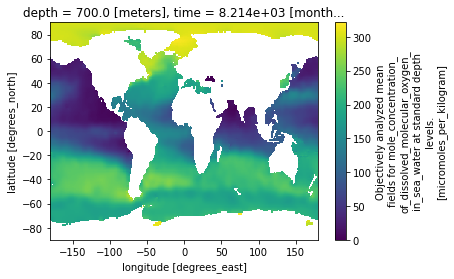

In [18]:
oxy_ds.o_an.sel(time=oxy_ds.time[0],depth=oxy_ds.depth[40]).plot()

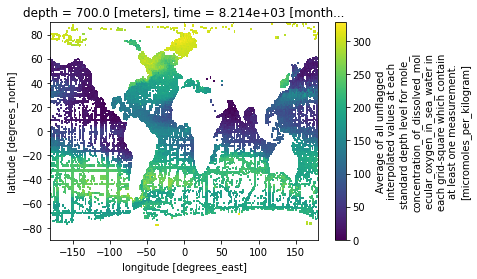

In [17]:
oxy_ds.o_mn.sel(time=oxy_ds.time[0],depth=oxy_ds.depth[40]).plot()

## East South Atlantic Central Water

In [314]:
min_lon = -10
max_lon = 15
min_lat = -15
max_lat = 0

## Subset
esaw_oxy_ds = oxy_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=oxy_ds.time[0])
esaw_temp_ds = temp_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=temp_ds.time[0])
esaw_sal_ds = sal_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=sal_ds.time[0])
esaw_den_ds = den_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=sal_ds.time[0])


## Make average profiles
esaw_mean_oxy = np.nanmean(esaw_oxy_ds.o_an, axis=(1,2))
esaw_mean_temp = np.nanmean(esaw_temp_ds.t_an, axis=(1,2))
esaw_mean_sal = np.nanmean(esaw_sal_ds.s_an, axis=(1,2))
esaw_mean_den = np.nanmean(esaw_den_ds.I_an, axis=(1,2))


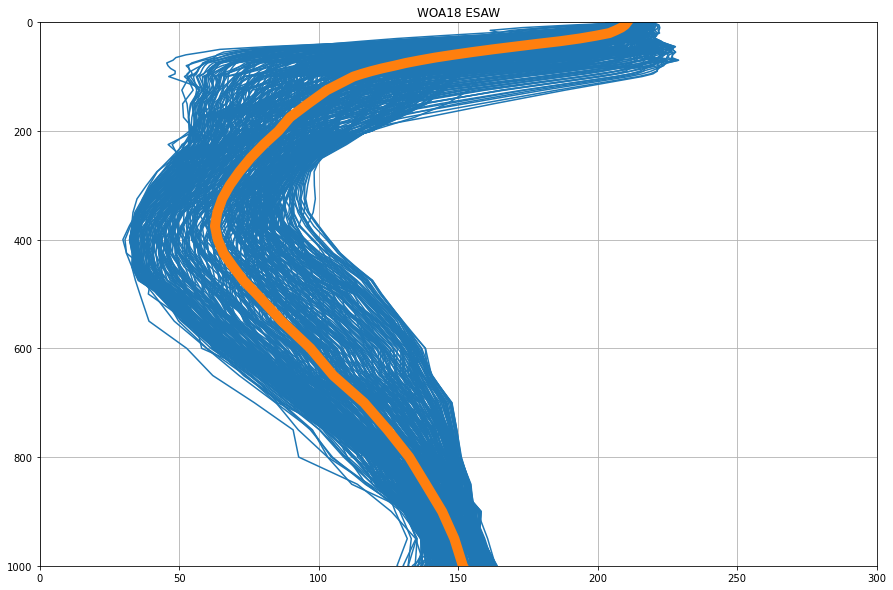

In [205]:


rows = esaw_oxy_ds.o_an.shape[1]
cols = esaw_oxy_ds.o_an.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(0,300)
plt.grid()
plt.title('WOA18 ESAW')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(esaw_oxy_ds.o_an[:,x,y],esaw_oxy_ds.depth,color='tab:blue')


plt.plot(esaw_mean_oxy,esaw_temp_ds.depth,color='tab:orange',linewidth=10)

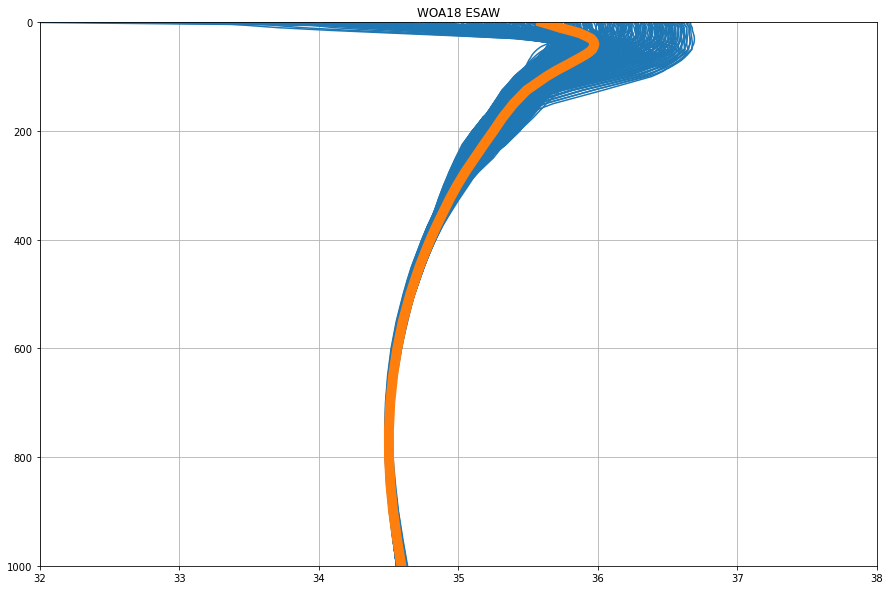

In [207]:
rows = esaw_oxy_ds.o_an.shape[1]
cols = esaw_oxy_ds.o_an.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(32,38)
plt.grid()
plt.title('WOA18 ESAW')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(esaw_sal_ds.s_an[:,x,y],esaw_sal_ds.depth,color='tab:blue')

plt.plot(esaw_mean_sal,esaw_sal_ds.depth,color='tab:orange',linewidth=10)

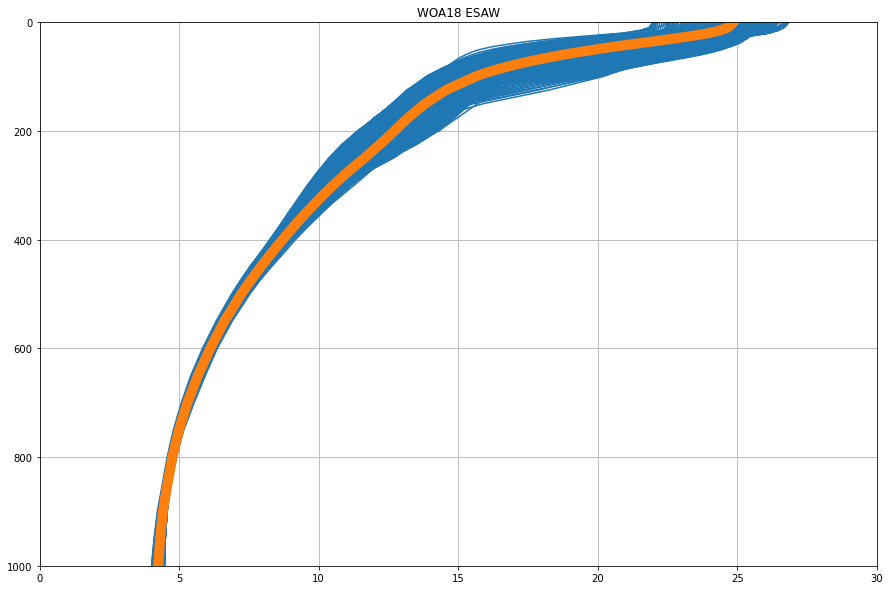

In [203]:
rows = esaw_temp_ds.t_an.shape[1]
cols = esaw_temp_ds.t_an.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(0,30)
plt.grid()
plt.title('WOA18 ESAW')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(esaw_temp_ds.t_an[:,x,y],esaw_temp_ds.depth,color='tab:blue')

plt.plot(esaw_mean_temp,esaw_temp_ds.depth,color='tab:orange',linewidth=10)

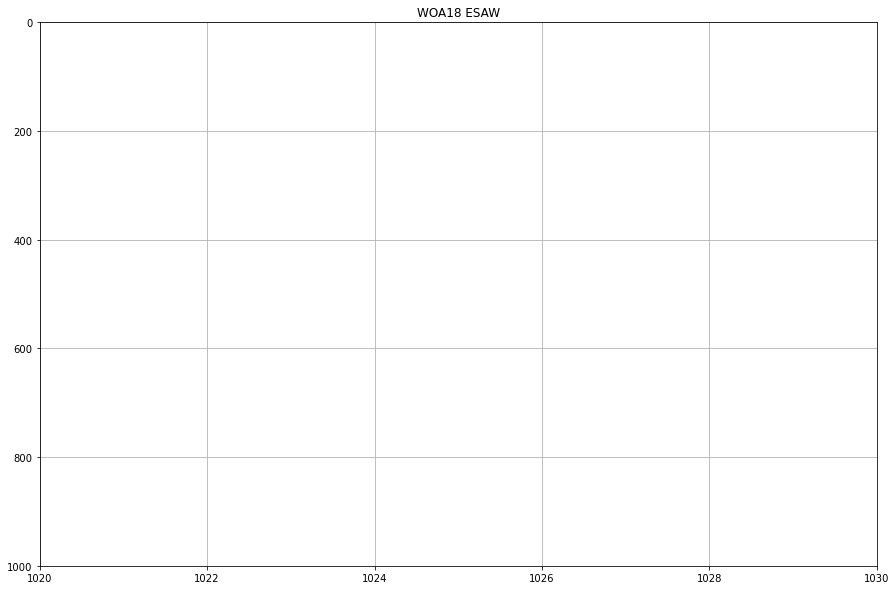

In [316]:


rows = esaw_den_ds.I_an.shape[1]
cols = esaw_den_ds.I_an.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(1020,1030)
plt.grid()
plt.title('WOA18 ESAW')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(esaw_den_ds.I_an[:,x,y],esaw_den_ds.depth,color='tab:blue')


plt.plot(esaw_mean_den,esaw_den_ds.depth,color='tab:orange',linewidth=10)

## West South Atlantic Water

In [114]:
min_lon = -50
max_lon = -25
min_lat = -40
max_lat = -20

## subset
wsaw_oxy_ds = oxy_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=oxy_ds.time[0])
wsaw_temp_ds = temp_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=temp_ds.time[0])
wsaw_sal_ds = sal_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=sal_ds.time[0])

## Make average profiles
wsaw_mean_oxy = np.nanmean(wsaw_oxy_ds.o_an, axis=(1,2))
wsaw_mean_temp = np.nanmean(wsaw_temp_ds.t_an, axis=(1,2))
wsaw_mean_sal = np.nanmean(wsaw_sal_ds.s_an, axis=(1,2))

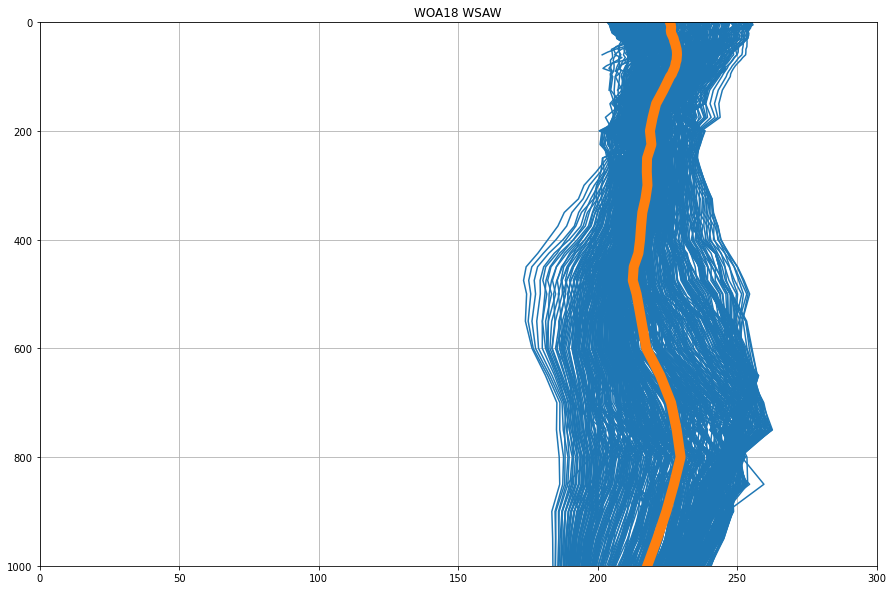

In [208]:
rows = wsaw_oxy_ds.o_an.shape[1]
cols = wsaw_oxy_ds.o_an.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(0,300)
plt.grid()
plt.title('WOA18 WSAW')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(wsaw_oxy_ds.o_an[:,x,y],wsaw_oxy_ds.depth,color='tab:blue')

plt.plot(wsaw_mean_oxy,wsaw_oxy_ds.depth,color='tab:orange',linewidth=10)

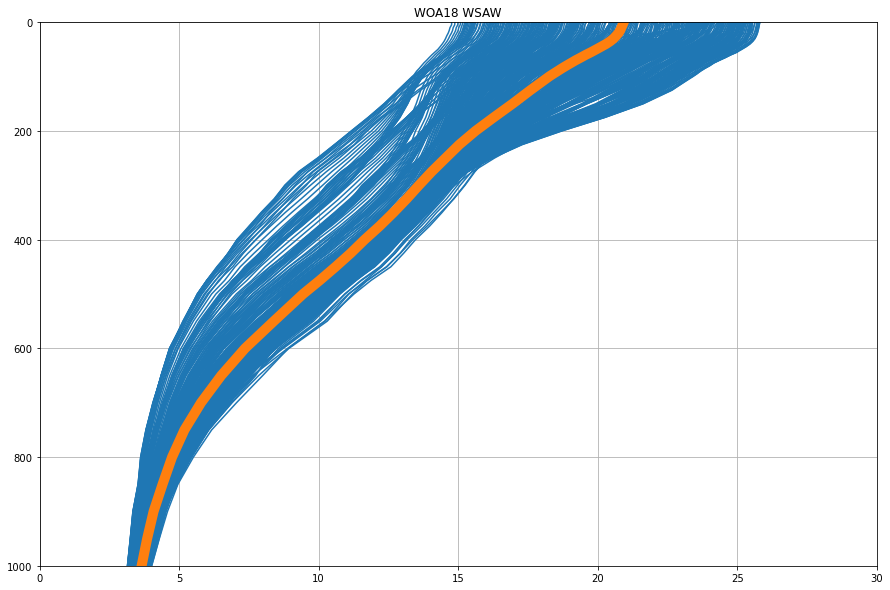

In [209]:
rows = wsaw_temp_ds.t_an.shape[1]
cols = wsaw_temp_ds.t_an.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(0,30)
plt.grid()
plt.title('WOA18 WSAW')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(wsaw_temp_ds.t_an[:,x,y],wsaw_temp_ds.depth,color='tab:blue')

plt.plot(wsaw_mean_temp,wsaw_temp_ds.depth,color='tab:orange',linewidth=10)

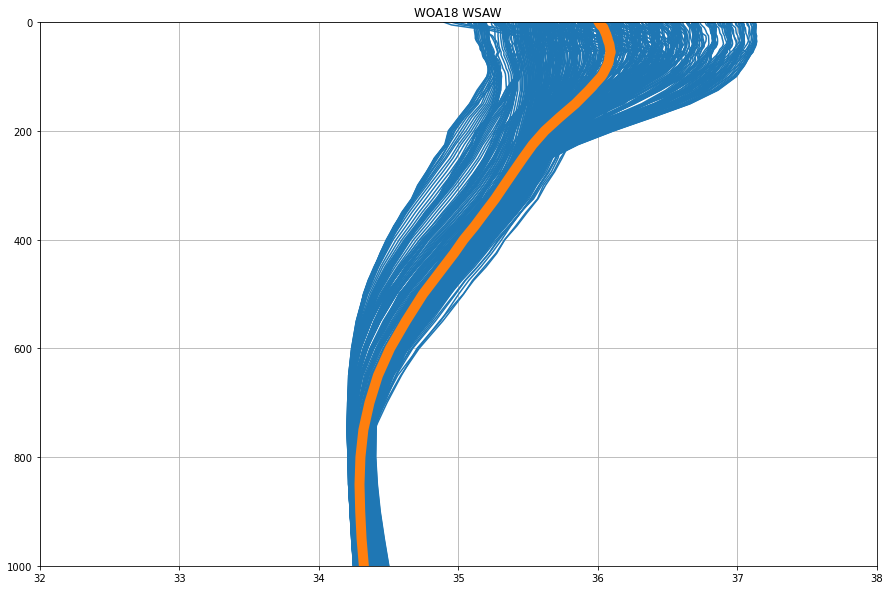

In [210]:
rows = wsaw_oxy_ds.o_an.shape[1]
cols = wsaw_oxy_ds.o_an.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(32,38)
plt.grid()
plt.title('WOA18 WSAW')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(wsaw_sal_ds.s_an[:,x,y],wsaw_sal_ds.depth,color='tab:blue')

plt.plot(wsaw_mean_sal,wsaw_temp_ds.depth,color='tab:orange',linewidth=10)

## North Atlantic Water

In [252]:
### NAW ###
min_lon = -70
max_lon = -35
min_lat = 25    #### should we do 25 instead, right?
max_lat = 40

## subset
naw_oxy_ds = oxy_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=oxy_ds.time[0])
naw_temp_ds = temp_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=temp_ds.time[0])
naw_sal_ds = sal_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=sal_ds.time[0])

## average profile
naw_mean_oxy = np.nanmean(naw_oxy_ds.o_an, axis=(1,2))
naw_mean_temp = np.nanmean(naw_temp_ds.t_an, axis=(1,2))
naw_mean_sal = np.nanmean(naw_sal_ds.s_an, axis=(1,2))

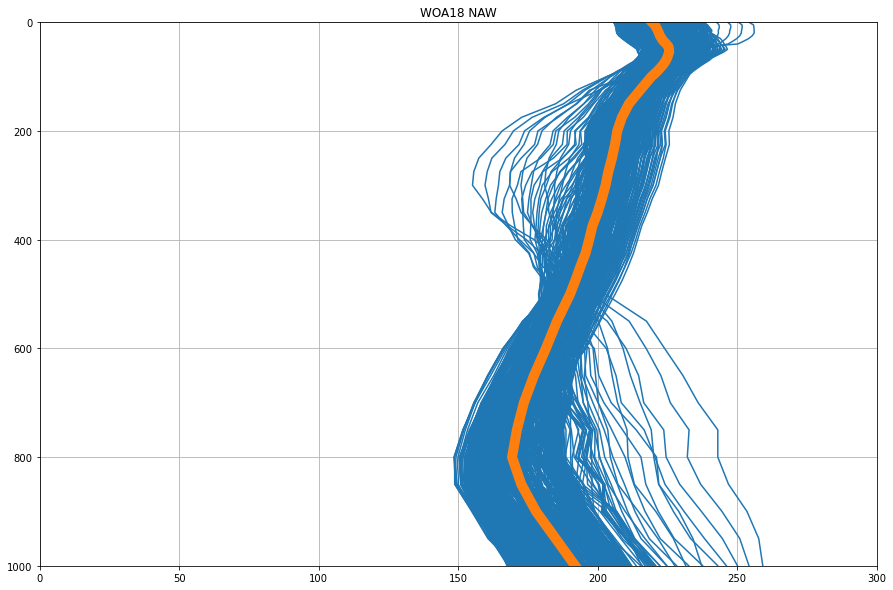

In [253]:
rows = naw_oxy_ds.o_an.shape[1]
cols = naw_oxy_ds.o_an.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(0,300)
plt.grid()
plt.title('WOA18 NAW')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(naw_oxy_ds.o_an[:,x,y],naw_oxy_ds.depth,color='tab:blue')

plt.plot(naw_mean_oxy,naw_oxy_ds.depth,color='tab:orange',linewidth=10)

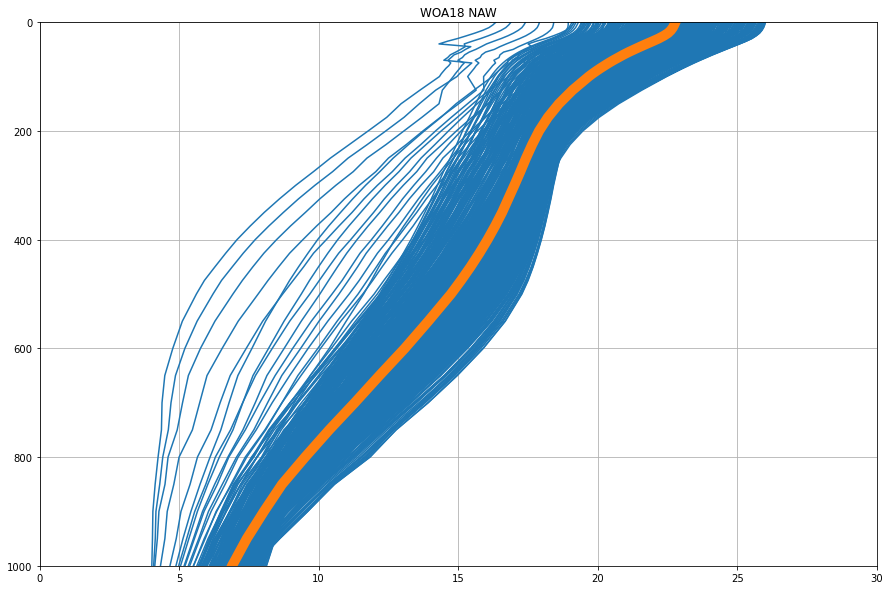

In [254]:
rows = naw_temp_ds.t_an.shape[1]
cols = naw_temp_ds.t_an.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(0,30)
plt.grid()
plt.title('WOA18 NAW')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(naw_temp_ds.t_an[:,x,y],naw_temp_ds.depth,color='tab:blue')

plt.plot(naw_mean_temp,naw_temp_ds.depth,color='tab:orange',linewidth=10)

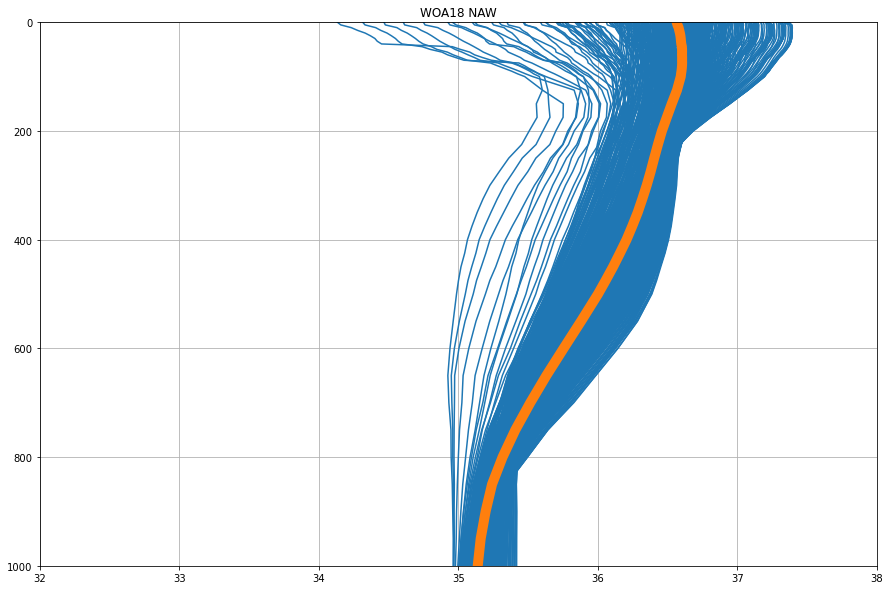

In [255]:
rows = naw_sal_ds.s_an.shape[1]
cols = naw_sal_ds.s_an.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(32,38)
plt.grid()
plt.title('WOA18 NAW')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(naw_sal_ds.s_an[:,x,y],naw_sal_ds.depth,color='tab:blue')

plt.plot(naw_mean_sal,naw_sal_ds.depth,color='tab:orange',linewidth=10)

## ESAW2

In [256]:
### ESAW2 ###
min_lon = -10
max_lon = 15
min_lat = -40
max_lat = -21

## Subset
esaw2_oxy_ds = oxy_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=oxy_ds.time[0])
esaw2_temp_ds = temp_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=temp_ds.time[0])
esaw2_sal_ds = sal_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=sal_ds.time[0])

## Make average profiles
esaw2_mean_oxy = np.nanmean(esaw2_oxy_ds.o_an, axis=(1,2))
esaw2_mean_temp = np.nanmean(esaw2_temp_ds.t_an, axis=(1,2))
esaw2_mean_sal = np.nanmean(esaw2_sal_ds.s_an, axis=(1,2))

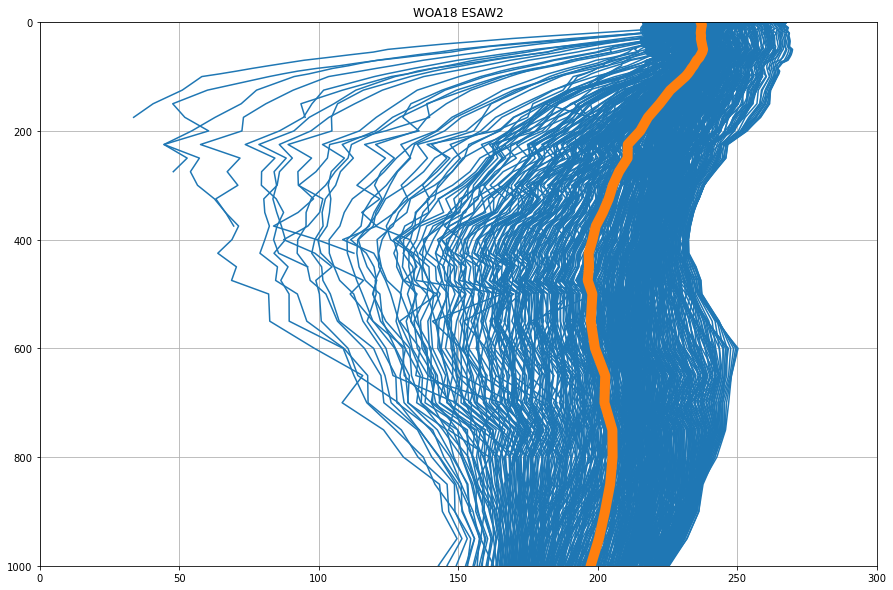

In [257]:
rows = esaw2_oxy_ds.o_an.shape[1]
cols = esaw2_oxy_ds.o_an.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(0,300)
plt.grid()
plt.title('WOA18 ESAW2')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(esaw2_oxy_ds.o_an[:,x,y],esaw2_oxy_ds.depth,color='tab:blue')


plt.plot(esaw2_mean_oxy,esaw2_temp_ds.depth,color='tab:orange',linewidth=10)

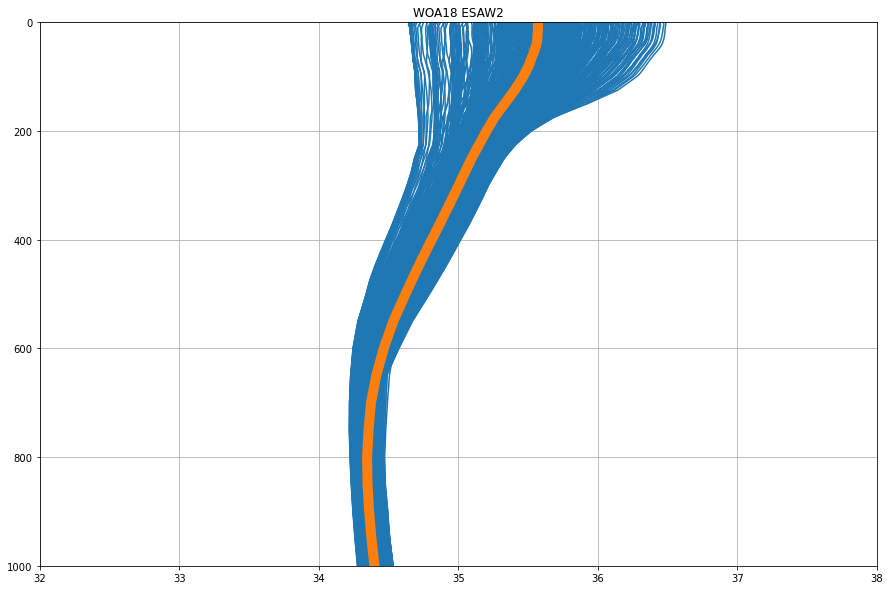

In [258]:
rows = esaw2_oxy_ds.o_an.shape[1]
cols = esaw2_oxy_ds.o_an.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(32,38)
plt.grid()
plt.title('WOA18 ESAW2')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(esaw2_sal_ds.s_an[:,x,y],esaw2_sal_ds.depth,color='tab:blue')

plt.plot(esaw2_mean_sal,esaw2_sal_ds.depth,color='tab:orange',linewidth=10)

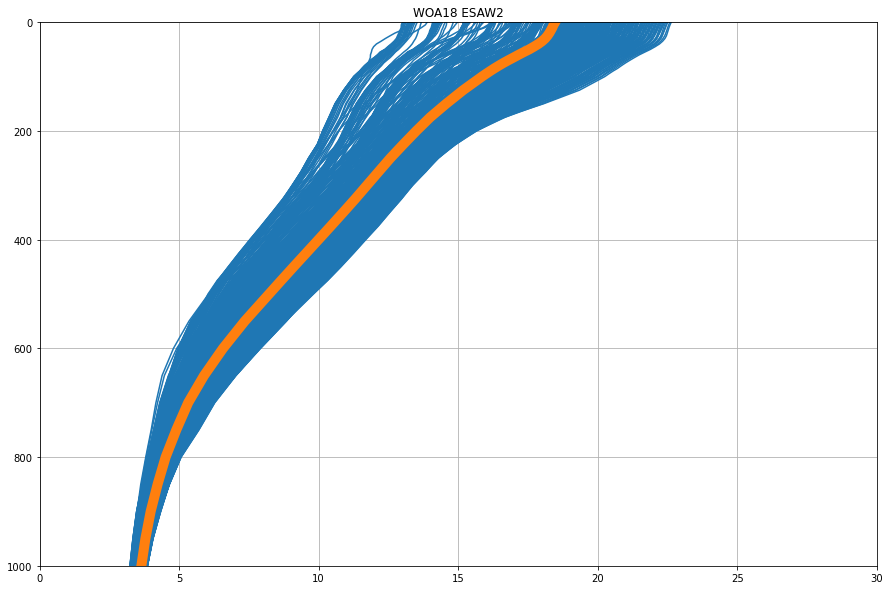

In [259]:
rows = esaw2_temp_ds.t_an.shape[1]
cols = esaw2_temp_ds.t_an.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(0,30)
plt.grid()
plt.title('WOA18 ESAW2')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(esaw2_temp_ds.t_an[:,x,y],esaw2_temp_ds.depth,color='tab:blue')

plt.plot(esaw2_mean_temp,esaw2_temp_ds.depth,color='tab:orange',linewidth=10)

## Plots of the mean profiles

Text(0.5, 1.0, 'World Ocean Atlas 2018 \n Mean Profiles from Source Water Regions')

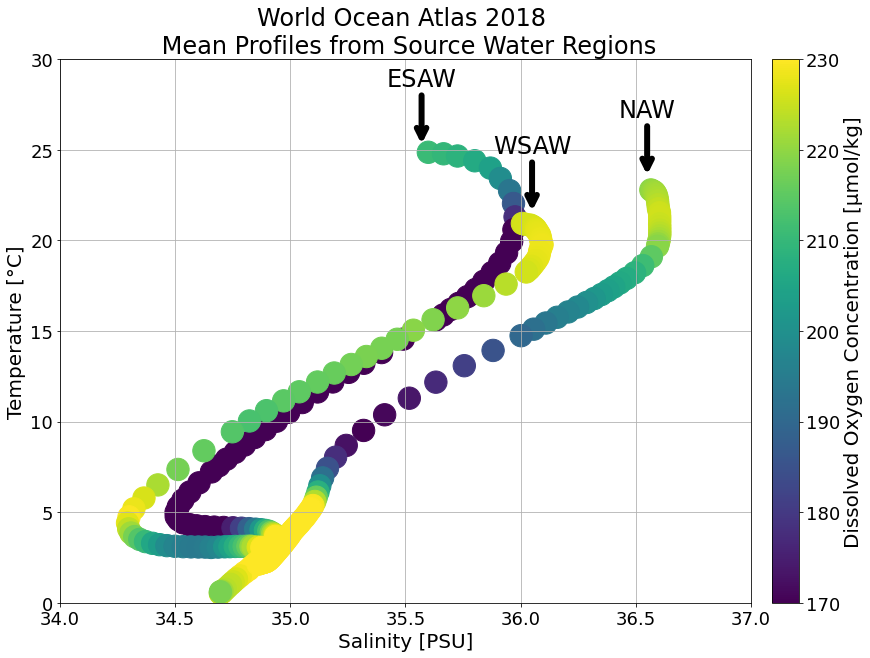

In [273]:
plt.figure(figsize=(15,10))

###### Scatter point settings
## color range
vmin=170
vmax=230
## markersize
s = 500

## ESAW
plt.scatter(esaw_mean_sal,esaw_mean_temp,c=esaw_mean_oxy,s=s,vmin=vmin,vmax=vmax)
plt.annotate(
'ESAW', xy=(35.57, 25.2),xytext=(35.57, 28.5) ,
size=24, horizontalalignment="center",
arrowprops=dict(arrowstyle='->',lw=6)
)

## WSAW
plt.scatter(wsaw_mean_sal,wsaw_mean_temp,c=wsaw_mean_oxy,s=s,vmin=vmin,vmax=vmax)
plt.annotate(
'WSAW', xy=(36.05, 21.5),xytext=(36.05, 24.8) ,
size=24, horizontalalignment="center",
arrowprops=dict(arrowstyle='->',lw=6)
)

## NAW
plt.scatter(naw_mean_sal,naw_mean_temp,c=naw_mean_oxy,s=s,vmin=vmin,vmax=vmax)
plt.annotate(
'NAW', xy=(36.55, 23.5),xytext=(36.55, 26.8) ,
size=24, horizontalalignment="center",
arrowprops=dict(arrowstyle='->',lw=6)
)


## ESAW2
# plt.scatter(esaw2_mean_sal,esaw2_mean_temp,c=esaw2_mean_oxy,s=s,vmin=vmin,vmax=vmax)
# plt.annotate(
# 'ESAW', xy=(35.57, 25.2),xytext=(35.57, 28.5) ,
# size=24, horizontalalignment="center",
# arrowprops=dict(arrowstyle='->',lw=6)
# )


plt.gca().tick_params(axis='both', which='major', labelsize=18)
plt.gca().tick_params(axis='both', which='minor', labelsize=18)
plt.ylim(0,30)
plt.xlim(34,37)
plt.xlabel('Salinity [PSU]', size=20)
plt.ylabel('Temperature [''\N{DEGREE SIGN}''C]', size=20)
cbar = plt.colorbar(pad=0.025)
cbar.set_label('Dissolved Oxygen Concentration ['u"\u03bc"'mol/kg]', size=20)
cbar.ax.tick_params(labelsize=18)
plt.grid()
plt.title('World Ocean Atlas 2018 \n Mean Profiles from Source Water Regions',size=24)

In [280]:
def plot_TS_contours(mint,maxt,mins,maxs):
    # mint=np.nanmin(T)
    # maxt=np.nanmax(T)
    # mins=np.nanmin(S)
    # maxs=np.nanmax(S)
    tempL=np.linspace(mint-1,maxt+1,399)
    salL=np.linspace(mins-1,maxs+1,399)
    Tg, Sg = np.meshgrid(tempL,salL)
    sigma_theta = gsw.sigma0(Sg, Tg)+1000 # ignore effects of pressure on density
    cnt = np.linspace(sigma_theta.min(), sigma_theta.max(),399)
    ind = np.argwhere(sigma_theta > 1015.7)
    st_short = sigma_theta[ind]
    cs = ax.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1 ,levels=np.arange(st_short.min(), st_short.max()+1,1), vmin = 1014, vmax = 1029)
    levels = cs.levels
    cl= ax.clabel(cs,levels, fontsize=10,inline=True,fmt='%.1f')
    return cs

Text(0.5, 1.0, 'World Ocean Atlas 2018 \n Mean Profiles from Source Water Regions')

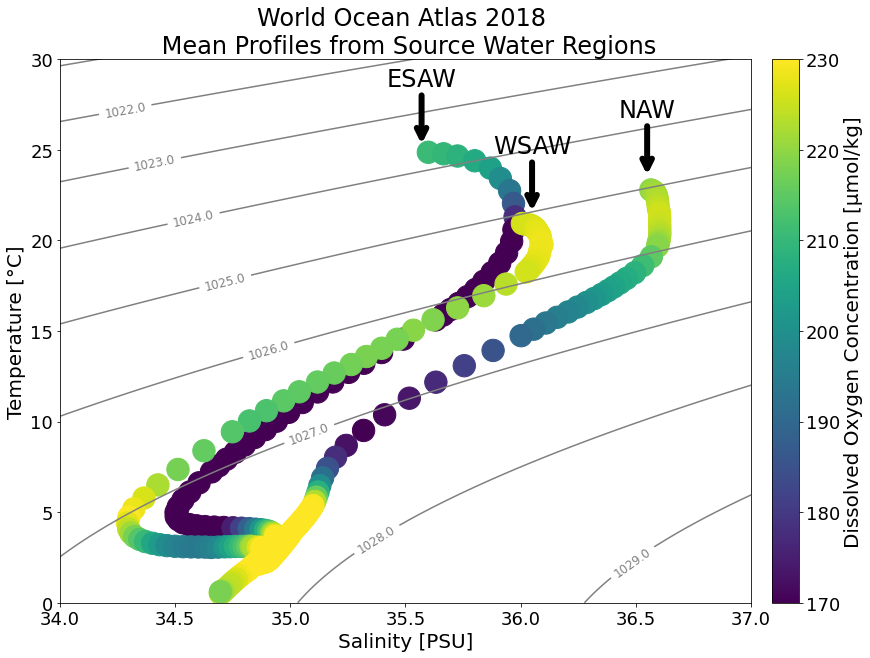

In [311]:
plt.figure(figsize=(15,10))

###### Scatter point settings
## color range
vmin=170
vmax=230
## markersize
s = 500

## ESAW
plt.scatter(esaw_mean_sal,esaw_mean_temp,c=esaw_mean_oxy,s=s,vmin=vmin,vmax=vmax)
plt.annotate(
'ESAW', xy=(35.57, 25.2),xytext=(35.57, 28.5) ,
size=24, horizontalalignment="center",
arrowprops=dict(arrowstyle='->',lw=6)
)

## WSAW
plt.scatter(wsaw_mean_sal,wsaw_mean_temp,c=wsaw_mean_oxy,s=s,vmin=vmin,vmax=vmax)
plt.annotate(
'WSAW', xy=(36.05, 21.5),xytext=(36.05, 24.8) ,
size=24, horizontalalignment="center",
arrowprops=dict(arrowstyle='->',lw=6)
)

## NAW
plt.scatter(naw_mean_sal,naw_mean_temp,c=naw_mean_oxy,s=s,vmin=vmin,vmax=vmax)
plt.annotate(
'NAW', xy=(36.55, 23.5),xytext=(36.55, 26.8) ,
size=24, horizontalalignment="center",
arrowprops=dict(arrowstyle='->',lw=6)
)


## ESAW2
# plt.scatter(esaw2_mean_sal,esaw2_mean_temp,c=esaw2_mean_oxy,s=s,vmin=vmin,vmax=vmax)
# plt.annotate(
# 'ESAW', xy=(35.57, 25.2),xytext=(35.57, 28.5) ,
# size=24, horizontalalignment="center",
# arrowprops=dict(arrowstyle='->',lw=6)
# )


plt.gca().tick_params(axis='both', which='major', labelsize=18)
plt.gca().tick_params(axis='both', which='minor', labelsize=18)
plt.ylim(0,30)
plt.xlim(34,37)
plt.xlabel('Salinity [PSU]', size=20)
plt.ylabel('Temperature [''\N{DEGREE SIGN}''C]', size=20)
cbar = plt.colorbar(pad=0.025)
cbar.set_label('Dissolved Oxygen Concentration ['u"\u03bc"'mol/kg]', size=20)
cbar.ax.tick_params(labelsize=18)

######## This plots the contours
mint=1
maxt=30
mins=34
maxs=37
tempL=np.linspace(mint-1,maxt+1,399)
salL=np.linspace(mins-1,maxs+1,399)
Tg, Sg = np.meshgrid(tempL,salL)
sigma_theta = gsw.sigma0(Sg, Tg)+1000 # ignore effects of pressure on density
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(),399)
ind = np.argwhere(sigma_theta > 1015.7)
st_short = sigma_theta[ind]
cs = plt.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1 ,levels=np.arange(1020, 1030,1), vmin = 1020, vmax = 1030)
levels = cs.levels
manual_locations = [(34.3, 26), (34.4, 25), (34.6,20), (34.75,16), (34.95,12), (35.15,7), (35.4,3), (36.5,2)]
plt.clabel(cs,levels, fontsize=12,inline=True,fmt='%.1f', manual=manual_locations)

plt.title('World Ocean Atlas 2018 \n Mean Profiles from Source Water Regions',size=24)

In [294]:
np.arange(st_short.min(), st_short.max()+1,1)

array([1019.80647987, 1020.80647987, 1021.80647987, 1022.80647987,
       1023.80647987, 1024.80647987, 1025.80647987, 1026.80647987,
       1027.80647987, 1028.80647987, 1029.80647987, 1030.80647987])

Text(0.5, 1.0, 'World Ocean Atlas 2018 \n Mean Profiles from Source Water Regions')

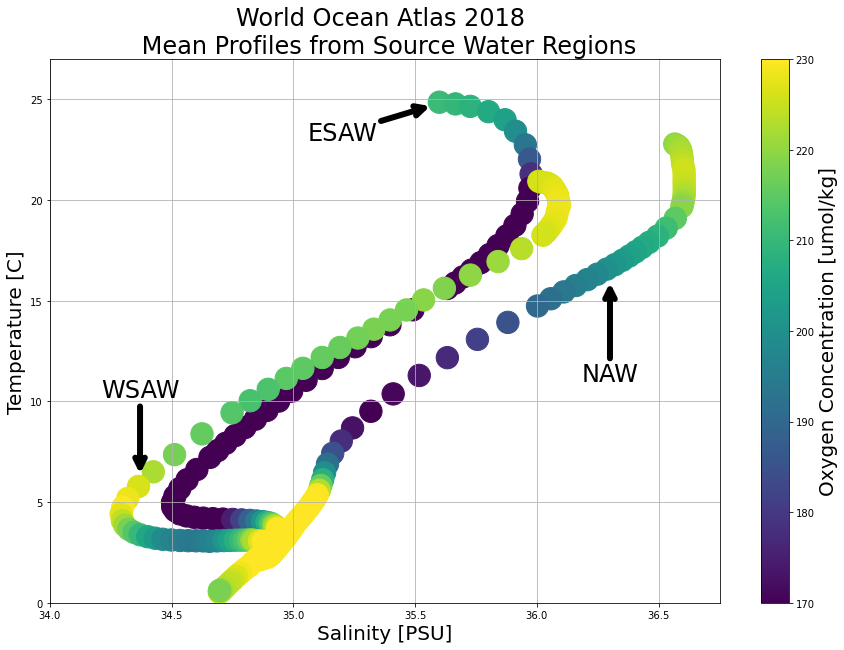

In [261]:
plt.figure(figsize=(15,10))

###### Scatter point settings
## color range
vmin=170
vmax=230
## markersize
s = 500

## ESAW
plt.scatter(esaw_mean_sal,esaw_mean_temp,c=esaw_mean_oxy,s=s,vmin=vmin,vmax=vmax)
plt.annotate(
'ESAW', xy=(35.57, 24.7),xytext=(35.2, 23) ,
size=24, horizontalalignment="center",
arrowprops=dict(arrowstyle='->',lw=6)
)

## WSAW
plt.scatter(wsaw_mean_sal,wsaw_mean_temp,c=wsaw_mean_oxy,s=s,vmin=vmin,vmax=vmax)
plt.annotate(
'WSAW', xy=(34.37, 6.3),xytext=(34.37, 10.2) ,
size=24, horizontalalignment="center",
arrowprops=dict(arrowstyle='->',lw=6)
)

## NAW
plt.scatter(naw_mean_sal,naw_mean_temp,c=naw_mean_oxy,s=s,vmin=vmin,vmax=vmax)
plt.annotate(
'NAW', xy=(36.3, 16),xytext=(36.3, 11) ,
size=24, horizontalalignment="center",
arrowprops=dict(arrowstyle='->',lw=6)
)

plt.ylim(0,27)
plt.xlim(34,36.75)
plt.xlabel('Salinity [PSU]', size=20)
plt.ylabel('Temperature [C]', size=20)
cbar = plt.colorbar()
cbar.set_label('Oxygen Concentration [umol/kg]', size=20)
plt.grid()
plt.title('World Ocean Atlas 2018 \n Mean Profiles from Source Water Regions',size=24)

## Quick map of where the bounding boxes for the water mass formation regions are


No handles with labels found to put in legend.


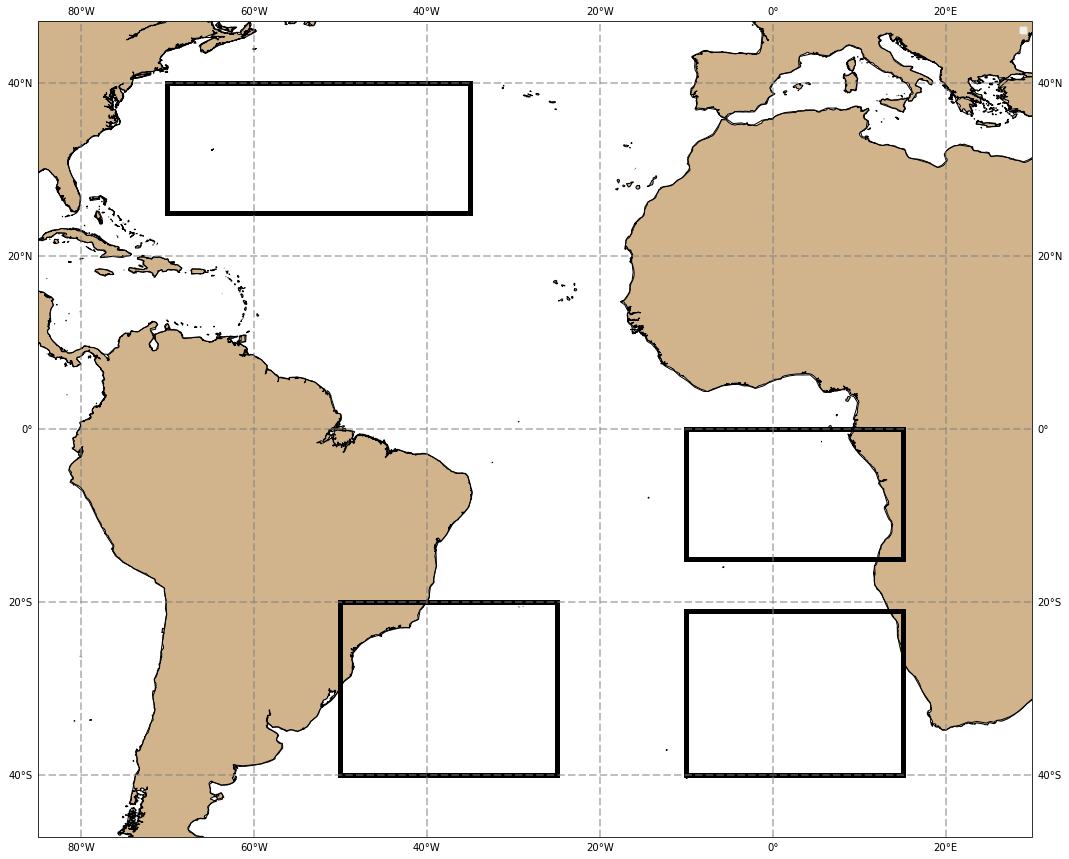

In [262]:


## Map extent
lon1 = -85
lon2 = 30
lat1 = -30
lat2 = 30

fig = plt.figure(figsize=(30,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([lon1, lon2, lat1, lat2])
LAND = cfeature.NaturalEarthFeature(
    'physical', 'land', '10m',
    edgecolor='black',
    facecolor='tan'
)
ax.add_feature(LAND, zorder=0)

#plt.plot(subset_df.longitude.values,subset_df.latitude.values,'.',markersize=1)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')



def plot_rectangle_on_map(min_lon,max_lon,min_lat,max_lat):
    width = np.abs(min_lon-max_lon)
    height = np.abs(max_lat-min_lat)
    ax.add_patch(mpatches.Rectangle(xy=[min_lon, min_lat], width=width, height=height,
                                    facecolor='None',
                                    edgecolor='black',
                                    linewidth=5,
                                    transform=ccrs.PlateCarree()))

### WSAW ###
min_lon = -50
max_lon = -25
min_lat = -40
max_lat = -20
plot_rectangle_on_map(min_lon,max_lon,min_lat,max_lat)

### ESAW ###
min_lon = -10
max_lon = 15
min_lat = -15
max_lat = 0
plot_rectangle_on_map(min_lon,max_lon,min_lat,max_lat)
plt.legend()

### NAW ###
min_lon = -70
max_lon = -35
min_lat = 25
max_lat = 40
plot_rectangle_on_map(min_lon,max_lon,min_lat,max_lat)


### ESAW2 ###
min_lon = -10
max_lon = 15
min_lat = -40
max_lat = -21
plot_rectangle_on_map(min_lon,max_lon,min_lat,max_lat)